In [32]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [33]:
def get_data(glob_pattern):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=0)
        
        timings_data = timings_data.melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [36]:
data = get_data("saved_runs/20241210T143500/??-*.timings.collected.csv")

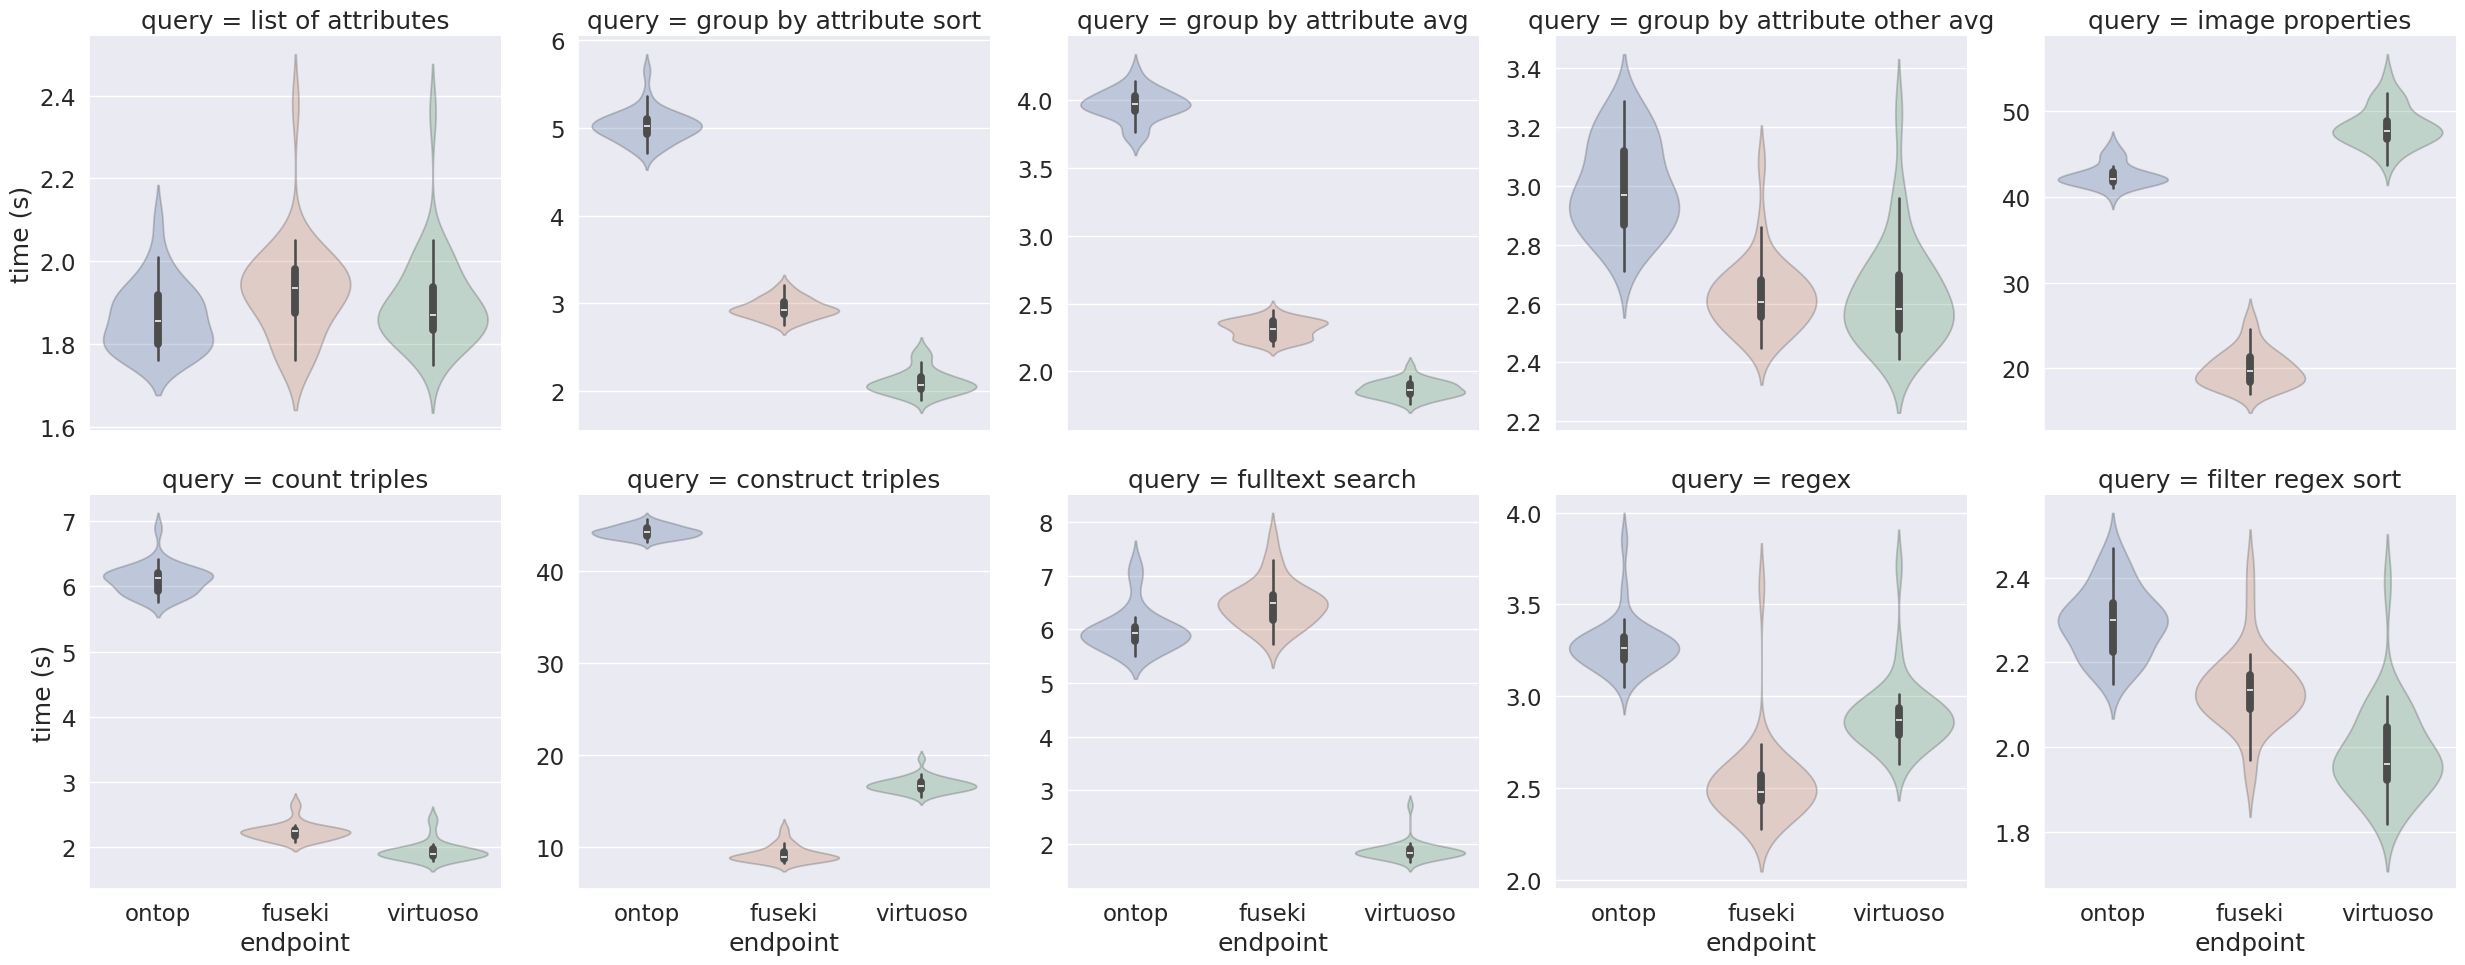

In [37]:
seaborn.set(font_scale=1.5)
seaborn.catplot(data=data[data.clock=='Wall (s)'],
                kind='violin',
                x='endpoint',
                y='time (s)',
                hue='endpoint',
                hue_order=['ontop',
                           'fuseki',
                           'virtuoso'],
                order=['ontop',
                       'fuseki',
                       'virtuoso'],
                col='query',
                alpha=0.3,
                sharey=False,
                legend='auto',
                col_wrap=5,
                col_order=['list of attributes',
                           'group by attribute sort',
                           'group by attribute avg',
                           'group by attribute other avg',
                           'image properties',
                           'count triples',
                           'construct triples',
                           'fulltext search',
                           'regex',
                           'filter regex sort',
                          ]
               ) 

mpl.pyplot.savefig("saved_runs/20241210T143500/facet_walltime.png")